In [16]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
import requests
from bs4 import BeautifulSoup
import time

base_url = "https://www.coingecko.com/?page="
headers = {
    "User-Agent": "Mozilla/5.0"  
}

all_rows = []

# Número de páginas a descargar
num_pages = 15

for page in range(1, num_pages + 1):
    print(f"Descargando página {page}...")
    url = f"{base_url}{page}"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")

    table = soup.find("table")
    if not table:
        print(f"No se encontró la tabla en la página {page}")
        continue

    # Solo extraemos las cabeceras de la primera página
    if page == 1:
        headers_row = table.find("thead").find_all("th")
        headers_text = [th.get_text(strip=True) for th in headers_row]

    # Extrae filas
    for tr in table.find("tbody").find_all("tr"):
        cells = [td.get_text(strip=True) for td in tr.find_all("td")]
        if cells:
            all_rows.append(cells)

    time.sleep(1) 

# Crear DataFrame
df = pd.DataFrame(all_rows, columns=headers_text)

# Guardar a CSV
df.to_csv("coingecko_data.csv", index=False)
print("Datos guardados correctamente en coingecko_data.csv")


Descargando página 1...
Descargando página 2...
Descargando página 3...
Descargando página 4...
Descargando página 5...
Descargando página 6...
Descargando página 7...
Descargando página 8...
Descargando página 9...
Descargando página 10...
Descargando página 11...
Descargando página 12...
Descargando página 13...
Descargando página 14...
Descargando página 15...
Datos guardados correctamente en coingecko_data.csv


In [12]:
df=pd.read_csv("coingecko_data.csv")
df.head()

,Unnamed: 0,#,Coin,Unnamed: 3,Price,1h,24h,7d,30d,24h Volume,Market Cap,FDV,Market Cap / FDV,Last 7 Days
0,NaN,1,BitcoinBTC,Buy,"$111,776",0.0%,2.1%,1.6%,3.2%,"$39,824,620,842","$2,227,006,379,056","$2,227,006,379,056",1.0,NaN
1,NaN,2,EthereumETH,Buy,"$4,109.32",0.0%,2.4%,2.3%,6.2%,"$25,410,974,738","$495,013,837,365","$495,013,837,365",1.0,NaN
2,NaN,3,TetherUSDT,Buy,$1.00,0.0%,0.0%,0.0%,0.0%,"$78,171,070,939","$174,404,923,389","$174,404,923,389",1.0,NaN
3,NaN,4,XRPXRP,Buy,$2.90,1.5%,4.1%,1.3%,2.5%,"$3,670,753,648","$173,396,269,635","$289,790,691,964",0.6,NaN
4,NaN,5,BNBBNB,Buy,"$1,010.29",0.0%,4.2%,1.2%,17.4%,"$1,606,111,900","$140,401,428,260","$140,401,428,260",1.0,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      float64
 1   #                 1500 non-null   int64  
 2   Coin              1500 non-null   object 
 3   Unnamed: 3        112 non-null    object 
 4   Price             1500 non-null   object 
 5   1h                1500 non-null   object 
 6   24h               1500 non-null   object 
 7   7d                1500 non-null   object 
 8   30d               1500 non-null   object 
 9   24h Volume        1500 non-null   object 
 10  Market Cap        1500 non-null   object 
 11  FDV               1500 non-null   object 
 12  Market Cap / FDV  1497 non-null   float64
 13  Last 7 Days       0 non-null      float64
dtypes: float64(3), int64(1), object(10)
memory usage: 164.2+ KB


In [14]:
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("#", axis=1)
df = df.drop("Unnamed: 3", axis=1)
df = df.drop("Last 7 Days", axis=1)


In [15]:
df.head()

,Coin,Price,1h,24h,7d,30d,24h Volume,Market Cap,FDV,Market Cap / FDV
0,BitcoinBTC,"$111,776",0.0%,2.1%,1.6%,3.2%,"$39,824,620,842","$2,227,006,379,056","$2,227,006,379,056",1.0
1,EthereumETH,"$4,109.32",0.0%,2.4%,2.3%,6.2%,"$25,410,974,738","$495,013,837,365","$495,013,837,365",1.0
2,TetherUSDT,$1.00,0.0%,0.0%,0.0%,0.0%,"$78,171,070,939","$174,404,923,389","$174,404,923,389",1.0
3,XRPXRP,$2.90,1.5%,4.1%,1.3%,2.5%,"$3,670,753,648","$173,396,269,635","$289,790,691,964",0.6
4,BNBBNB,"$1,010.29",0.0%,4.2%,1.2%,17.4%,"$1,606,111,900","$140,401,428,260","$140,401,428,260",1.0


In [18]:
# Reemplazar '-' y '%' por NaN y convertir a float
for col in ['1h', '24h', '7d', '30d']:
    df[col] = df[col].replace('-', np.nan)
    df[col] = df[col].str.replace('%', '', regex=False)
    df[col] = df[col].astype(float)

In [20]:
# Extraer solo las columnas numéricas que usaremos para la correlación
price_variations = df[['1h', '24h', '7d', '30d']]
price_variations.index = df['Coin']


In [21]:
correlation_matrix = price_variations.T.corr()


In [22]:
# Crear grafo vacío
G = nx.Graph()

# Agregar nodos
for coin in correlation_matrix.index:
    G.add_node(coin)

# Agregar aristas si correlación > 0.8 (umbral)
threshold = 0.8
for i in range(len(correlation_matrix)):
    for j in range(i + 1, len(correlation_matrix)):
        corr_value = correlation_matrix.iloc[i, j]
        if corr_value > threshold:
            coin_i = correlation_matrix.index[i]
            coin_j = correlation_matrix.columns[j]
            G.add_edge(coin_i, coin_j, weight=corr_value)


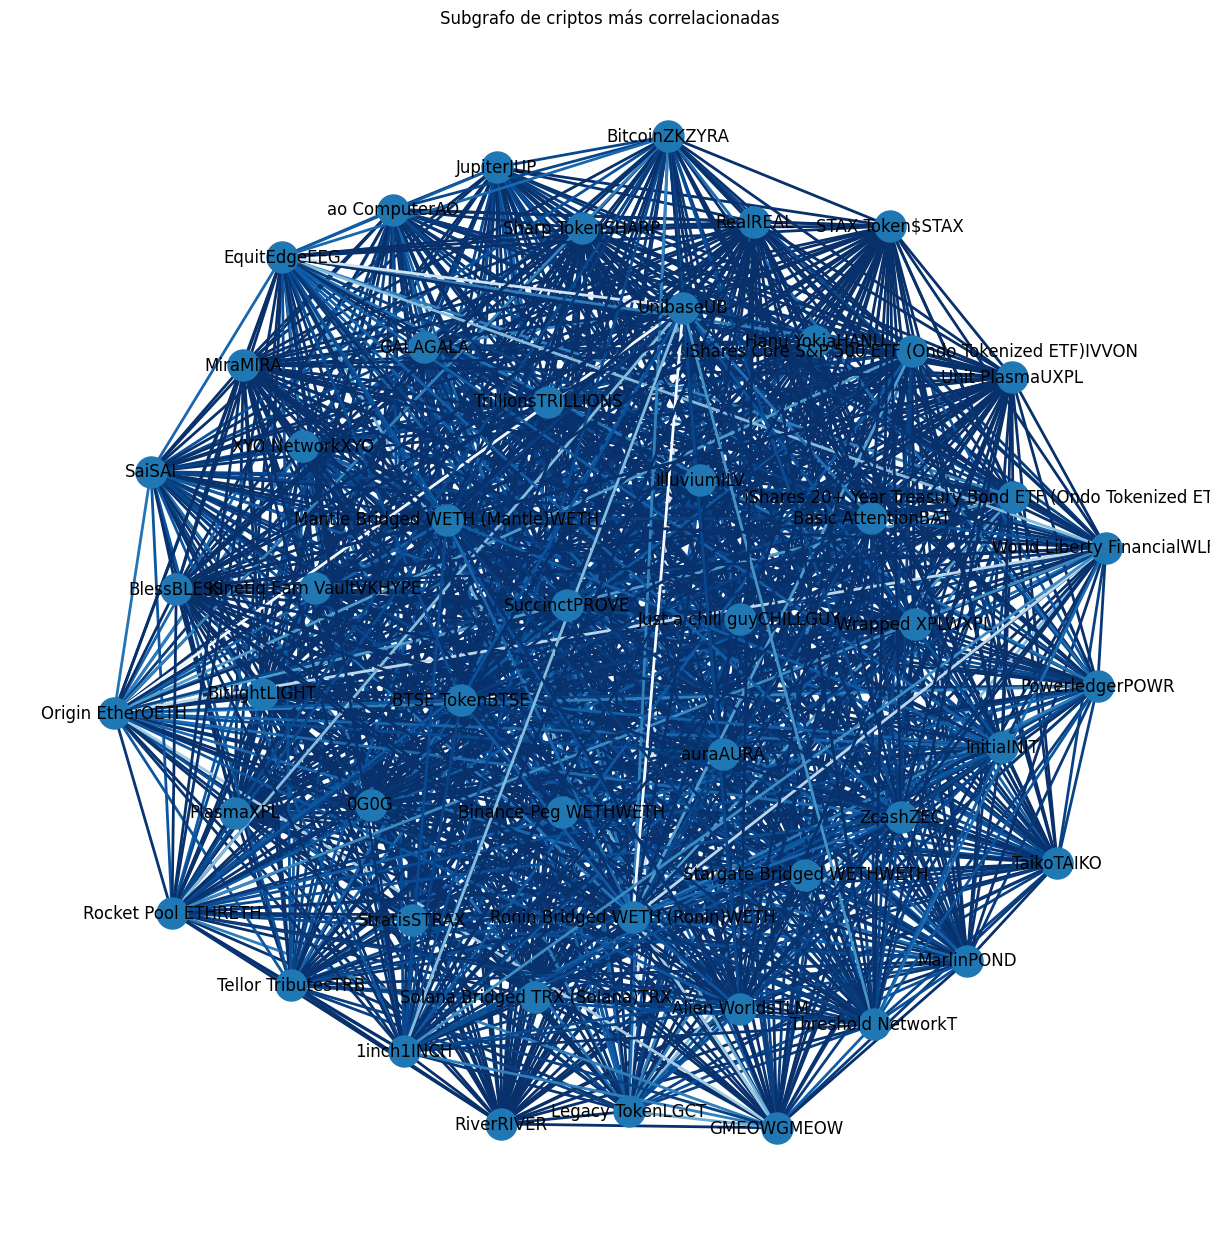

In [23]:
# Visualizar un subgrafo con los 50 nodos más conectados
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
subgraph = G.subgraph([node for node, _ in top_nodes])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)
edges = subgraph.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]

nx.draw(subgraph, pos, with_labels=True, node_size=500, edge_color=weights,
        edge_cmap=plt.cm.Blues, width=2)
plt.title("Subgrafo de criptos más correlacionadas")
plt.show()
